# **Visualización previa ¿Con qué datos contamos?**

## Limpieza previa

In [8]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import re
# Pequeña limpieza de datos
casa_df = pd.read_csv("../data/casa-encendida/casa_enc.csv",index_col=0)

precios = casa_df[["Precio","date","category"]].dropna()

casa_df["year"] = casa_df["date"].str.extract(r'(\d\d\d\d$)')

def to_int(x):
    exp = re.findall(r'\d+|Gratis',x)[0]
    if exp == 'Gratis':
        return 0
    else: return int(exp)
precios.loc[:,"Precio"] = precios["Precio"].apply(to_int)
precios = precios.sort_index(ascending=False)
casa_df.to_csv("../data/casa-encendida/casa_enc_year.csv")


In [3]:
#Observamos el dataframe
casa_df

,title,artist,date,description,text,tags,group,Dirigido a,Ubicación,Duración,Precio,event,category,url,image,year
0,Sonidos de barrio,Kleber Mendonça Filho,15 jul 2023,La película narra las realidades violentas ocu...,"Sonidos de barrio, de Kleber Mendoça Filho. Br...",['#Audiovisuales'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,1 hora 59 minutos,4€,No details,['CINE'],https://www.lacasaencendida.es/cine/sonidos-de...,https://www.lacasaencendida.es/storage/14817/r...,2023
1,Cashu,No definido,14 jul 2023,"Carolina Schutzer, alias DJ Cashu, es una de l...",En un intento de ocupar y descentralizar la es...,['#Música'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,1 hora,8€,Apertura de puertas a las 20:30 h.,['CONCIERTOS'],https://www.lacasaencendida.es/conciertos/cashu,https://www.lacasaencendida.es/storage/15099/r...,2023
2,El orden divino,Petra Biondina Volpe,13 jul 2023,"En los años setenta, las mujeres no podían vot...","El orden divino, de Petra Biondina Volpe, Suiz...",['#Feminismos'],Gestos necesarios para cambiar el mundo,Público general,Sala Audiovisual,2 horas 30 minutos,4€,"Coloquio con: \nMarifé Santiago Bolaños, poeta...","['CINE', 'ENCUENTROS']",https://www.lacasaencendida.es/cine/el-orden-d...,https://www.lacasaencendida.es/storage/13824/r...,2023
3,Loving,Jeff Nichols,11 jul 2023,En la tercera sesión del ciclo 'Gestos necesar...,"Loving, de Jeff Nichols, EEUU, 2016. 120 min. ...",['#Antirracismo / migración'],Gestos necesarios para cambiar el mundo,Público general,Sala Audiovisual,2 horas 30 minutos,4€,"Coloquio con: \nMoha Gerehou, periodista y exp...","['CINE', 'ENCUENTROS']",https://www.lacasaencendida.es/cine/loving-de-...,https://www.lacasaencendida.es/storage/13815/r...,2023
4,Greener Grass,Jocelyn DeBoer y Dawn Luebbe,8 jul 2023,Considerada una de las piezas más imaginativas...,"Greener Grass, de Jocelyn DeBoer y Dawn Luebbe...",['#Audiovisuales'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,1 hora 45 minutos,4€,No details,['CINE'],https://www.lacasaencendida.es/cine/greener-gr...,https://www.lacasaencendida.es/storage/14816/r...,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,Premio de fotografía humanitaria Luis Valtueña...,No definido,22 ene - 28 ene 2012,Alessandro Grassani recoge la dura vida de los...,NaN,[''],RADIO - Archivo de entrevistas,NaN,NaN,NaN,NaN,No details,['ENCUENTROS'],https://www.lacasaencendida.es/encuentros/prem...,https://www.lacasaencendida.es/storage/11143/r...,2012
4271,"Exposición ""El Paisaje Holandés""",No definido,22 ene - 28 ene 2012,"En los 60 en Holanda, un grupo de artistas cul...",NaN,[''],RADIO - Archivo de entrevistas,NaN,NaN,NaN,NaN,No details,['ENCUENTROS'],https://www.lacasaencendida.es/encuentros/expo...,https://www.lacasaencendida.es/storage/11353/r...,2012
4272,Entrevista a Teresa Aranguren,No definido,15 ene - 21 ene 2012,La periodista analiza la situación del pueblo ...,NaN,[''],RADIO - Archivo de entrevistas,NaN,NaN,NaN,NaN,No details,['ENCUENTROS'],https://www.lacasaencendida.es/encuentros/entr...,https://www.lacasaencendida.es/storage/11154/r...,2012
4273,Entrevista a Jonas Mekas,No definido,15 ene - 21 ene 2012,Un diario íntimo grabado en imágenes. El cinea...,NaN,[''],RADIO - Archivo de entrevistas,NaN,NaN,NaN,NaN,No details,['ENCUENTROS'],https://www.lacasaencendida.es/encuentros/entr...,https://www.lacasaencendida.es/storage/11155/r...,2012


## Precio de las entradas de la última temporada en función de la categoría

/var/folders/bt/7bxnp6hd33qdk5yq_vc14kf40000gn/T/ipykernel_30748/2980962608.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=precios["date"], rotation=45, ha='right')


<Axes: xlabel='date', ylabel='Precio'>

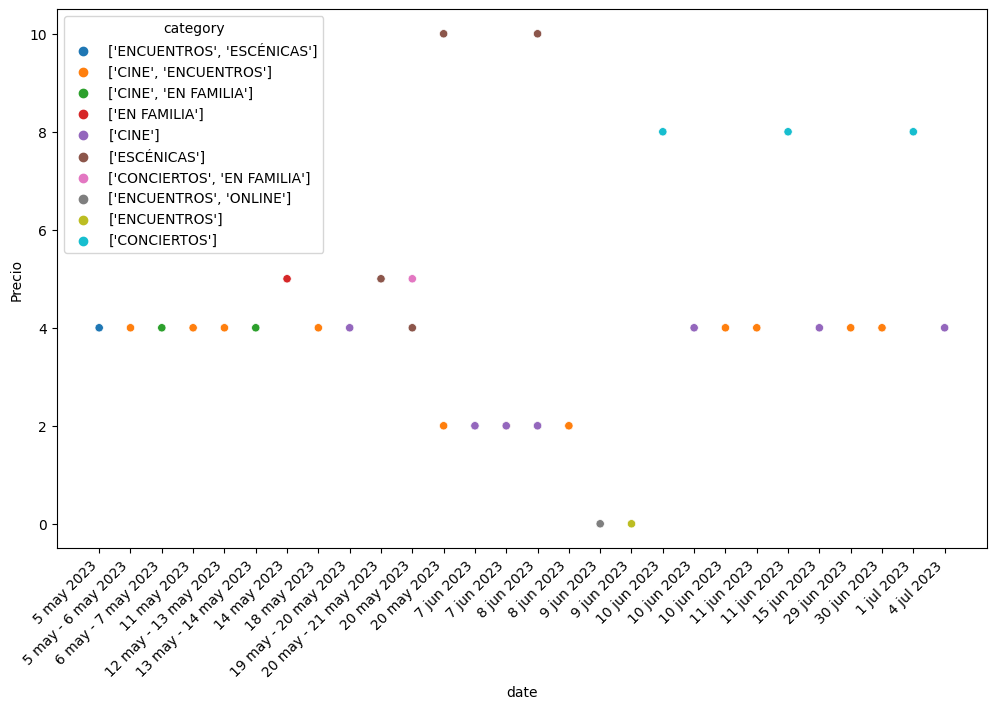

In [4]:
#Precios de las entradas
fig, ax = plt.subplots(figsize = (12,7))    
sns.scatterplot(data=precios,x="date",y="Precio",hue="category")
ax.set_xticklabels(labels=precios["date"], rotation=45, ha='right')
ax

## Eventos por año

,Año,Eventos
0,2012,412
1,2013,426
2,2014,391
3,2015,395
4,2016,371
5,2017,354
6,2018,362
7,2019,375
8,2020,346
9,2021,358


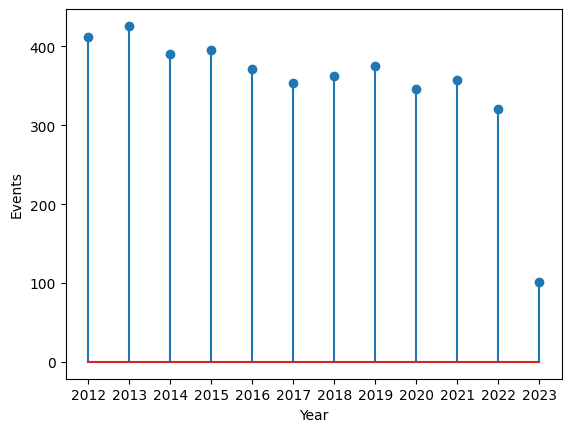

In [6]:
# Eventos por año
eventos_df = pd.DataFrame()

eventos_list = []
for i in range (2012,2024):
    eventos_dict = {}
    neventos = casa_df[casa_df["date"].str.contains(str(i))]
    eventos_dict["Año"] = str(i)
    eventos_dict["Eventos"]= neventos.shape[0]
    eventos_list.append(eventos_dict)
eventos_df = pd.DataFrame(eventos_list)

plt.stem(eventos_df['Año'],eventos_df['Eventos'])
plt.xlabel("Year")
plt.ylabel("Events")
eventos_df

    

# Eventos por mes

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3201: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


,Year,month,events
0,2012,ene,6
1,2012,feb,16
2,2012,mar,30
3,2012,abr,51
4,2012,may,47
...,...,...,...
139,2023,ago,0
140,2023,sep,0
141,2023,oct,0
142,2023,nov,0


<Figure size 3000x1000 with 0 Axes>

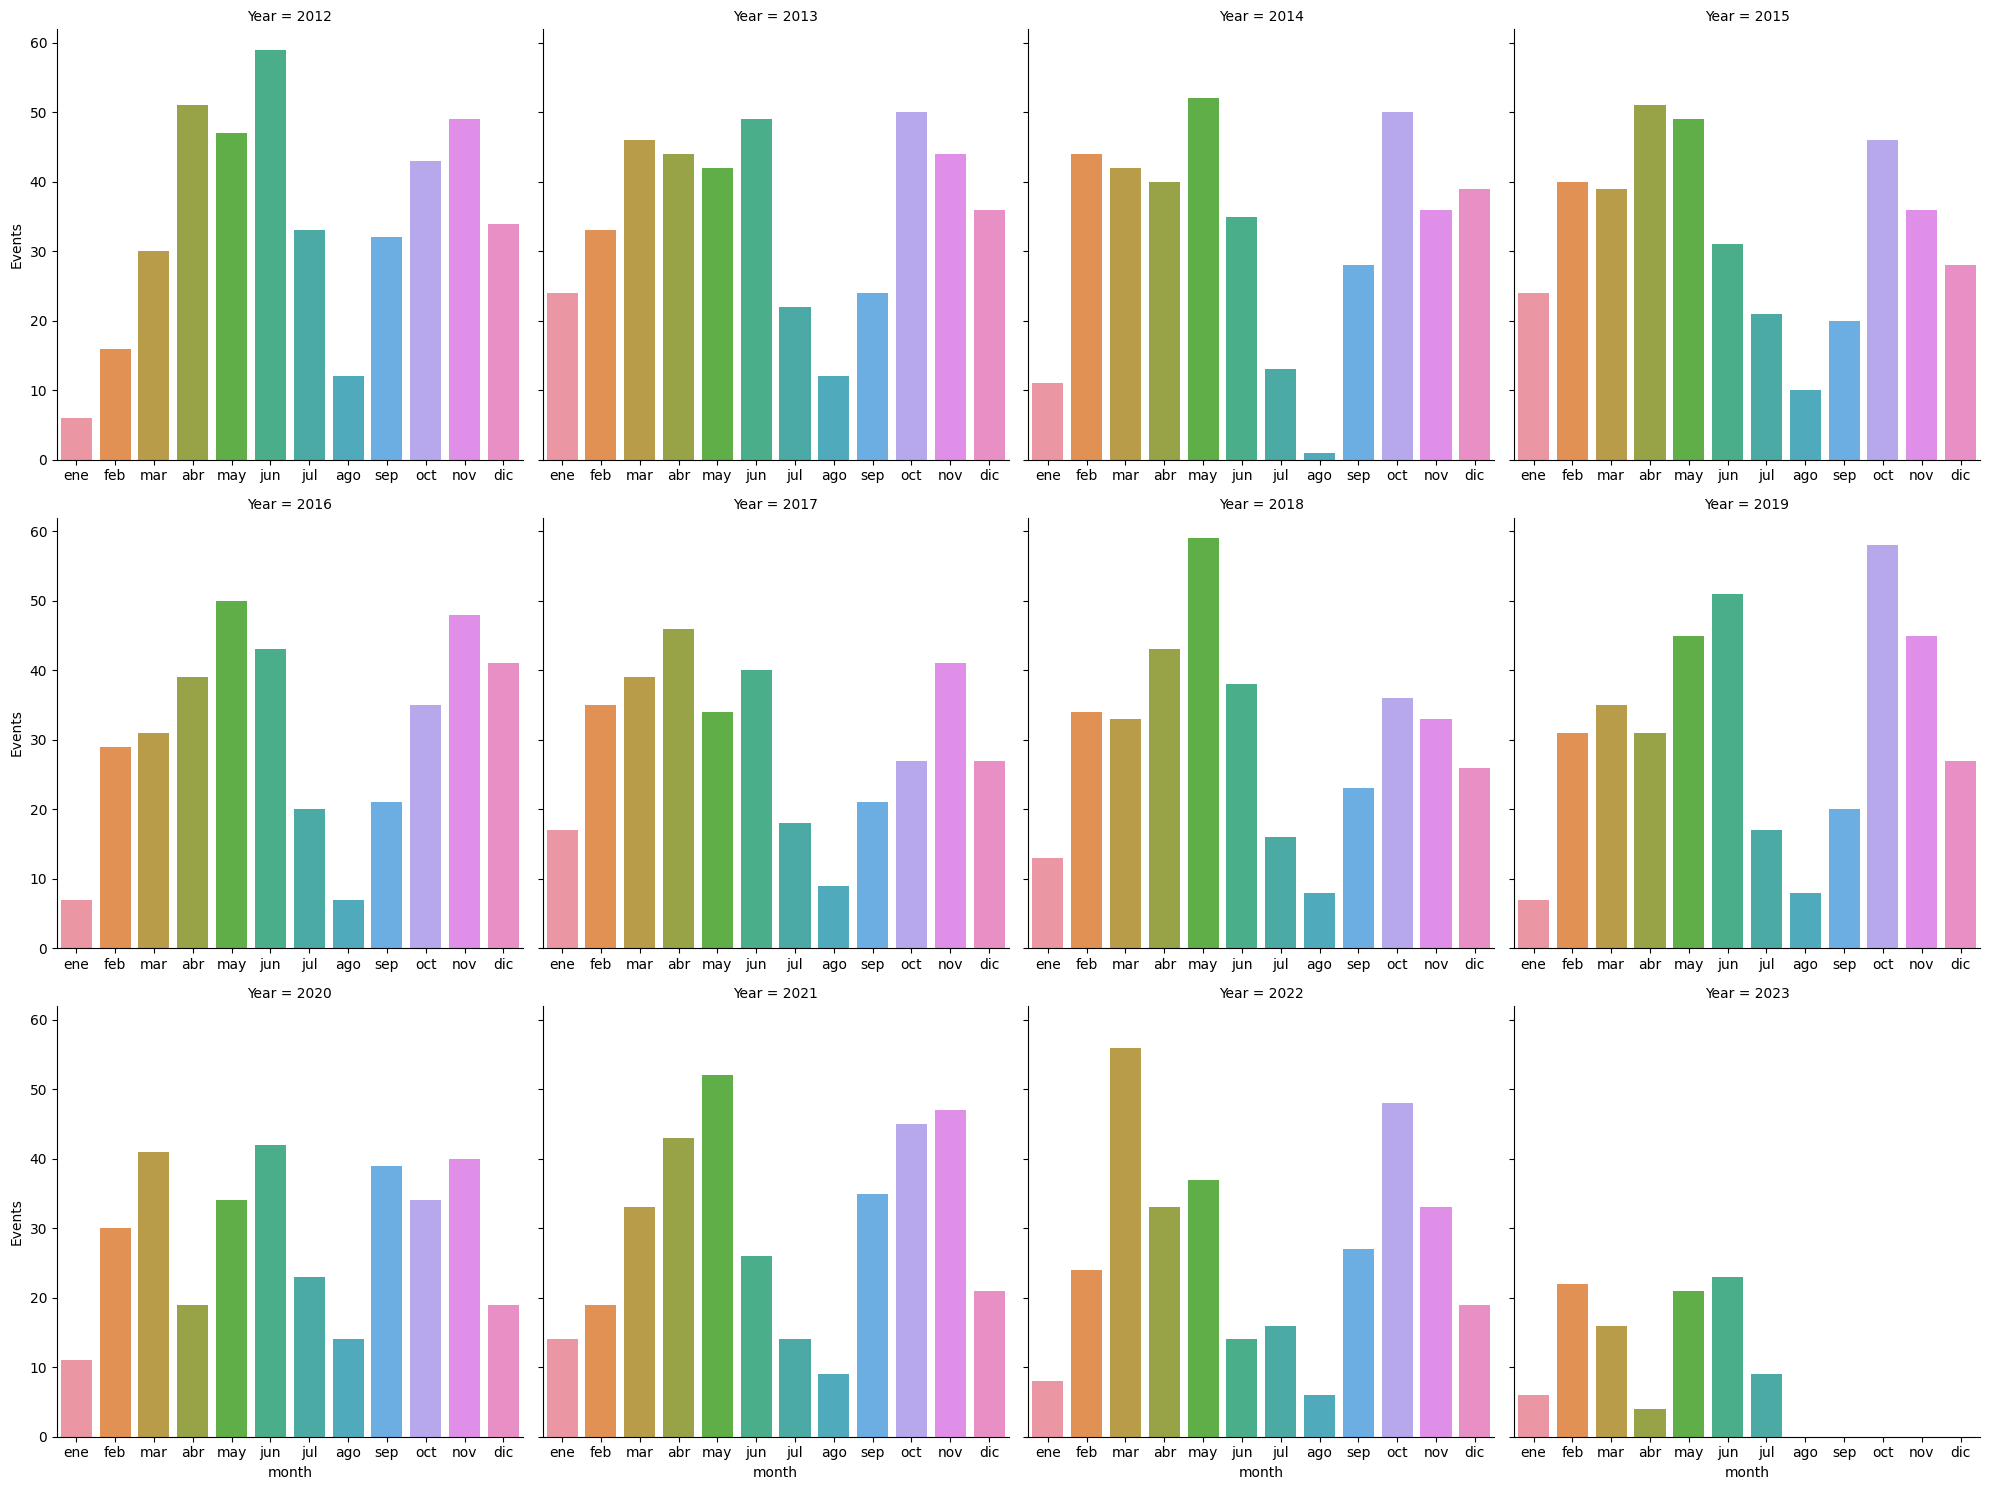

In [7]:
# Eventos por mes visualizado en años

month_list = []
years = range(2012,2024)
months = ["ene","feb","mar","abr","may","jun","jul","ago","sep","oct","nov","dic"]
for i in years:
    for j in months:
        month_dict = {}
        month_dict["Year"]= i
        month_dict["month"] = j
        month_dict["events"]= casa_df[casa_df["date"].str.contains(j+" "+str(i))].shape[0]
        month_list.append(month_dict)
month_df = pd.DataFrame(month_list)
plt.figure(figsize=(30,10));
sns.catplot(x="month",
            y="events",
            col="Year",
            col_wrap=4,
            data=month_df,
            kind="bar",sharex=False).set(ylabel='Events');

month_df


In [39]:
month_e = month_df.query("month == 'ene'")
month_e

,Year,month,events
0,2012,ene,6
12,2013,ene,24
24,2014,ene,11
36,2015,ene,24
48,2016,ene,7
60,2017,ene,17
72,2018,ene,13
84,2019,ene,7
96,2020,ene,11
108,2021,ene,14


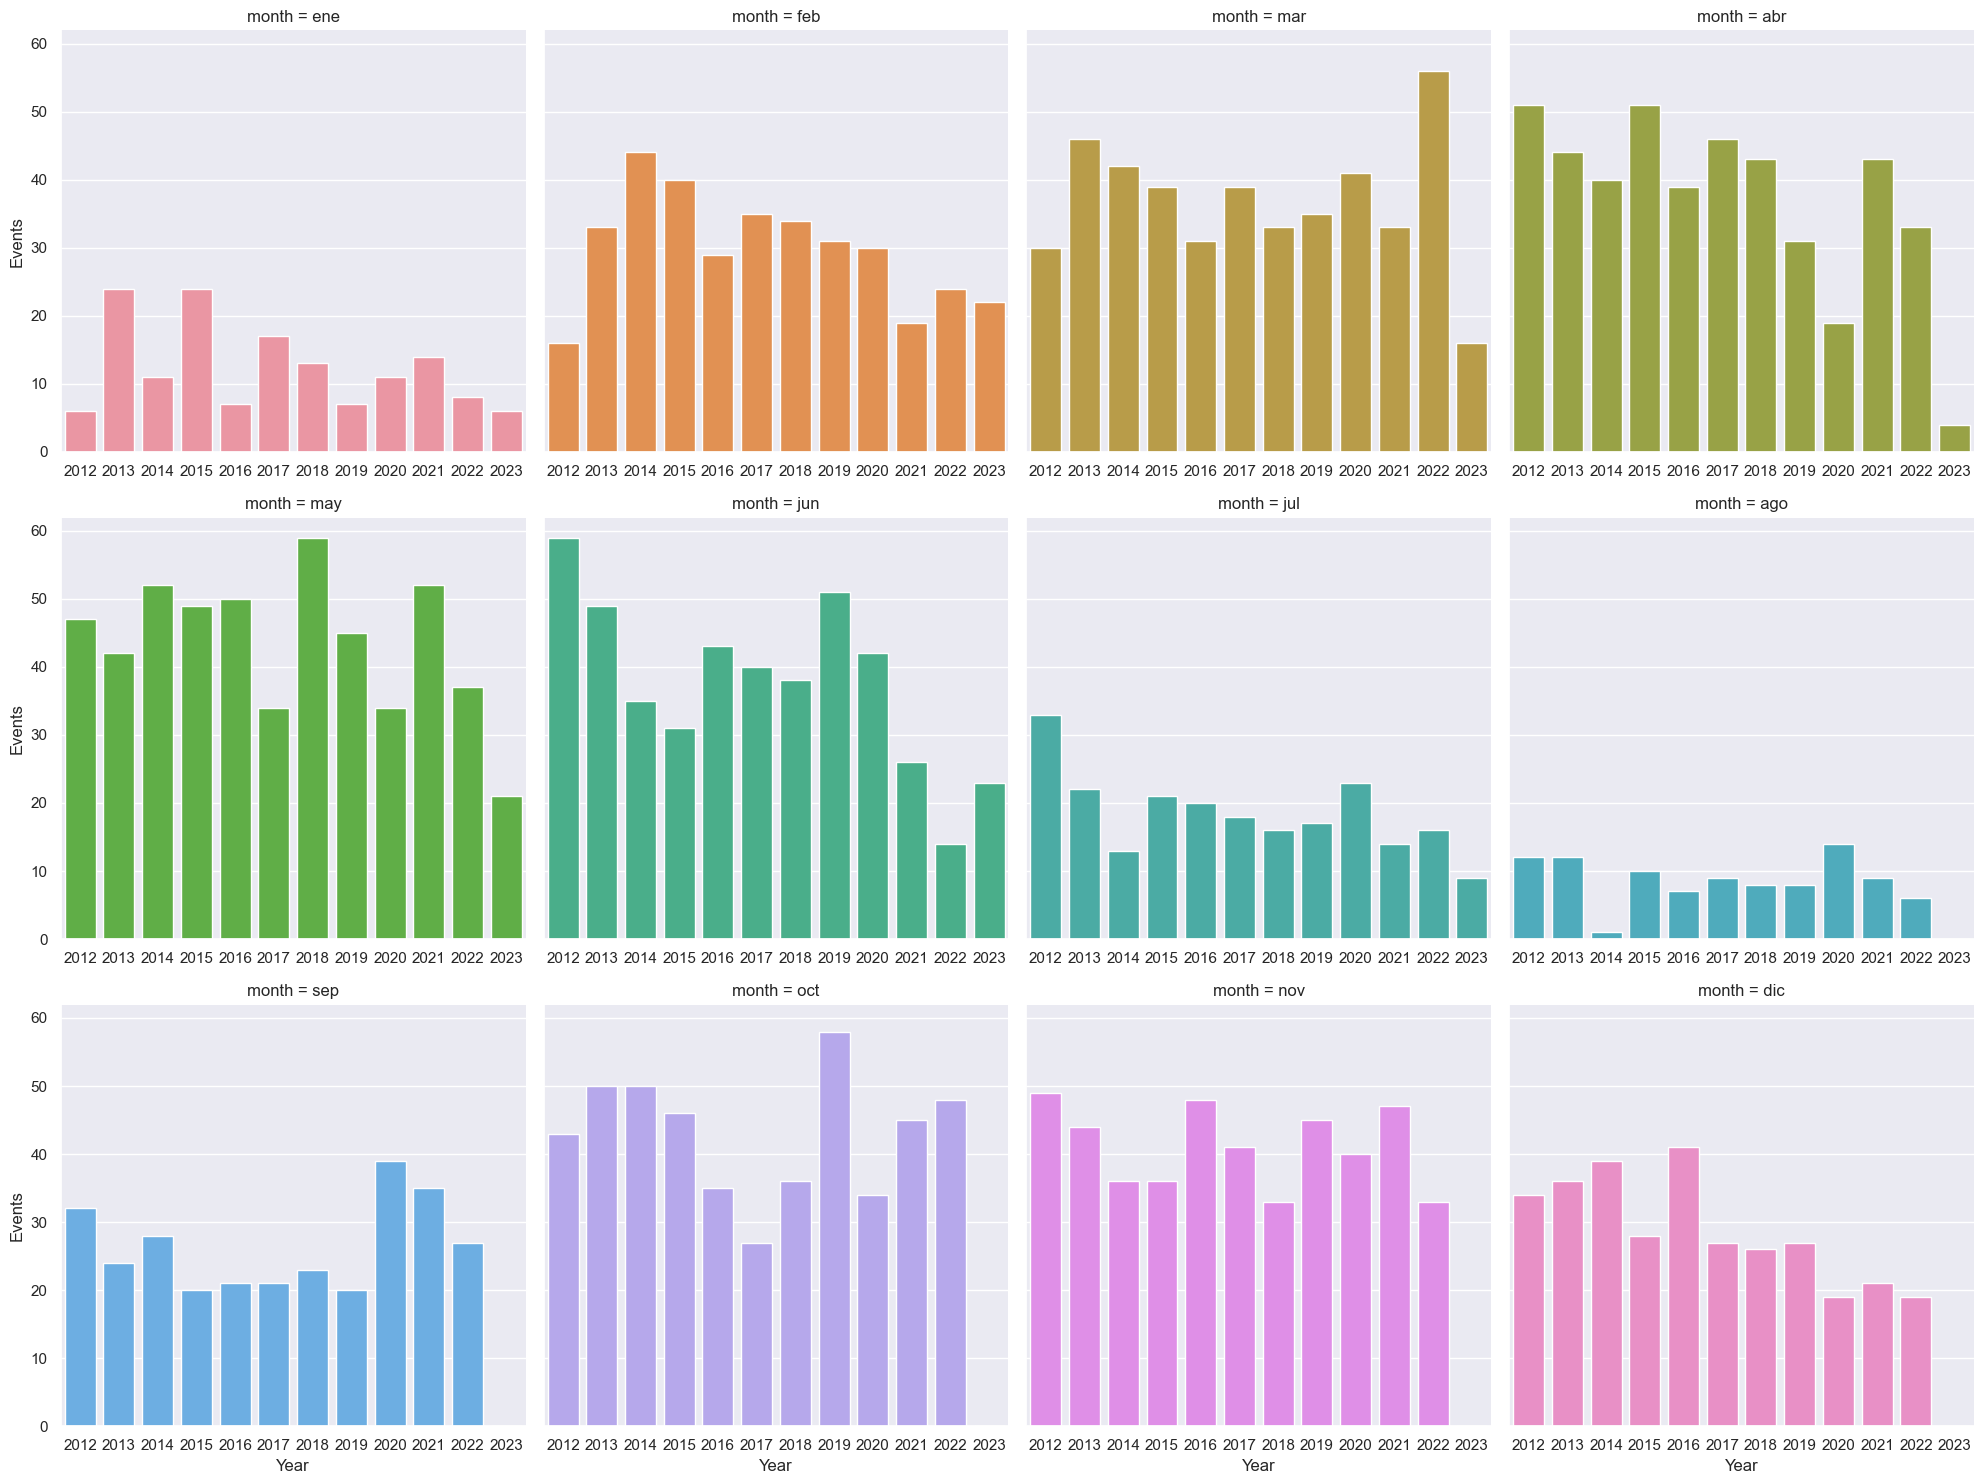

In [56]:
# Eventos por mes visualizado en meses
month_e = month_df.query("month == 'ene'")
month_e
sns.set(font_scale = 1)
by_month = sns.catplot(x="Year",
            y="events",
            col="month",
            col_wrap=4,
            data=month_df,
            kind="bar",
            hue= "month",dodge=False,sharex=False).set(ylabel='Events');
by_month.tight_layout()

## Datos estdísticos de los eventos

In [15]:
# Datos por año (todos los los años excepto 2023)
fig = px.box(eventos_df[0:-1], y="Eventos")
fig.show()
eventos_df[0:-1].describe()

,Eventos
count,11.000000
mean,373.727273
std,30.463391
min,321.000000
25%,356.000000
50%,371.000000
75%,393.000000
max,426.000000


In [18]:
# Datos por mes
fig = px.box(month_df, y="events")
fig.show()
month_df[["events"]].describe()

,events
count,144.00000
mean,29.25000
std,14.98974
min,0.00000
25%,17.75000
50%,31.00000
75%,41.00000
max,59.00000


# Visualización según las categorías

In [43]:
# Necesitamos seprar las categorías y los tags en valores individuales
casa_df

,title,artist,date,description,text,tags,group,Dirigido a,Ubicación,Duración,Precio,event,category,url,image,year
0,Sonidos de barrio,Kleber Mendonça Filho,15 jul 2023,La película narra las realidades violentas ocu...,"Sonidos de barrio, de Kleber Mendoça Filho. Br...",['#Audiovisuales'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,1 hora 59 minutos,4€,No details,['CINE'],https://www.lacasaencendida.es/cine/sonidos-de...,https://www.lacasaencendida.es/storage/14817/r...,2023
1,Cashu,No definido,14 jul 2023,"Carolina Schutzer, alias DJ Cashu, es una de l...",En un intento de ocupar y descentralizar la es...,['#Música'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,1 hora,8€,Apertura de puertas a las 20:30 h.,['CONCIERTOS'],https://www.lacasaencendida.es/conciertos/cashu,https://www.lacasaencendida.es/storage/15099/r...,2023
2,El orden divino,Petra Biondina Volpe,13 jul 2023,"En los años setenta, las mujeres no podían vot...","El orden divino, de Petra Biondina Volpe, Suiz...",['#Feminismos'],Gestos necesarios para cambiar el mundo,Público general,Sala Audiovisual,2 horas 30 minutos,4€,"Coloquio con: \nMarifé Santiago Bolaños, poeta...","['CINE', 'ENCUENTROS']",https://www.lacasaencendida.es/cine/el-orden-d...,https://www.lacasaencendida.es/storage/13824/r...,2023
3,Loving,Jeff Nichols,11 jul 2023,En la tercera sesión del ciclo 'Gestos necesar...,"Loving, de Jeff Nichols, EEUU, 2016. 120 min. ...",['#Antirracismo / migración'],Gestos necesarios para cambiar el mundo,Público general,Sala Audiovisual,2 horas 30 minutos,4€,"Coloquio con: \nMoha Gerehou, periodista y exp...","['CINE', 'ENCUENTROS']",https://www.lacasaencendida.es/cine/loving-de-...,https://www.lacasaencendida.es/storage/13815/r...,2023
4,Greener Grass,Jocelyn DeBoer y Dawn Luebbe,8 jul 2023,Considerada una de las piezas más imaginativas...,"Greener Grass, de Jocelyn DeBoer y Dawn Luebbe...",['#Audiovisuales'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,1 hora 45 minutos,4€,No details,['CINE'],https://www.lacasaencendida.es/cine/greener-gr...,https://www.lacasaencendida.es/storage/14816/r...,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,Premio de fotografía humanitaria Luis Valtueña...,No definido,22 ene - 28 ene 2012,Alessandro Grassani recoge la dura vida de los...,NaN,[''],RADIO - Archivo de entrevistas,NaN,NaN,NaN,NaN,No details,['ENCUENTROS'],https://www.lacasaencendida.es/encuentros/prem...,https://www.lacasaencendida.es/storage/11143/r...,2012
4271,"Exposición ""El Paisaje Holandés""",No definido,22 ene - 28 ene 2012,"En los 60 en Holanda, un grupo de artistas cul...",NaN,[''],RADIO - Archivo de entrevistas,NaN,NaN,NaN,NaN,No details,['ENCUENTROS'],https://www.lacasaencendida.es/encuentros/expo...,https://www.lacasaencendida.es/storage/11353/r...,2012
4272,Entrevista a Teresa Aranguren,No definido,15 ene - 21 ene 2012,La periodista analiza la situación del pueblo ...,NaN,[''],RADIO - Archivo de entrevistas,NaN,NaN,NaN,NaN,No details,['ENCUENTROS'],https://www.lacasaencendida.es/encuentros/entr...,https://www.lacasaencendida.es/storage/11154/r...,2012
4273,Entrevista a Jonas Mekas,No definido,15 ene - 21 ene 2012,Un diario íntimo grabado en imágenes. El cinea...,NaN,[''],RADIO - Archivo de entrevistas,NaN,NaN,NaN,NaN,No details,['ENCUENTROS'],https://www.lacasaencendida.es/encuentros/entr...,https://www.lacasaencendida.es/storage/11155/r...,2012


## Separamos los datos por caategorías y tags individuales

In [52]:
# Separamos las categorías y los tags
from ast import literal_eval
casa_df_sep = pd.read_csv("../data/casa-encendida/casa_enc_year.csv",converters={"category": literal_eval})
casa_df_sep[['category1','category2','category3','category4']] = pd.DataFrame(casa_df_sep.category.tolist(), index= casa_df_sep.index)
casa_df_sep
casa_df_sep[['non','tag1','tag2','tag3']] = casa_df_sep['tags'].str.split(r'#', expand=True,regex=True)
for i in range (1,4):
    casa_df_sep[f'tag{i}'] = casa_df_sep[f'tag{i}'].str.replace("']","",regex=True)
casa_df_sep.drop("non",axis=1,inplace=True)
casa_df_sep.head(20)
#casa_df_sep.to_csv("../data/casa-encendida/casa_enc_sep.csv")
#casa_df_sep["category4"].unique()

,Unnamed: 0,title,artist,date,description,text,tags,group,Dirigido a,Ubicación,...,url,image,year,category1,category2,category3,category4,tag1,tag2,tag3
0,0,Sonidos de barrio,Kleber Mendonça Filho,15 jul 2023,La película narra las realidades violentas ocu...,"Sonidos de barrio, de Kleber Mendoça Filho. Br...",['#Audiovisuales'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,...,https://www.lacasaencendida.es/cine/sonidos-de...,https://www.lacasaencendida.es/storage/14817/r...,2023.0,CINE,None,None,None,Audiovisuales,None,None
1,1,Cashu,No definido,14 jul 2023,"Carolina Schutzer, alias DJ Cashu, es una de l...",En un intento de ocupar y descentralizar la es...,['#Música'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,...,https://www.lacasaencendida.es/conciertos/cashu,https://www.lacasaencendida.es/storage/15099/r...,2023.0,CONCIERTOS,None,None,None,Música,None,None
2,2,El orden divino,Petra Biondina Volpe,13 jul 2023,"En los años setenta, las mujeres no podían vot...","El orden divino, de Petra Biondina Volpe, Suiz...",['#Feminismos'],Gestos necesarios para cambiar el mundo,Público general,Sala Audiovisual,...,https://www.lacasaencendida.es/cine/el-orden-d...,https://www.lacasaencendida.es/storage/13824/r...,2023.0,CINE,ENCUENTROS,None,None,Feminismos,None,None
3,3,Loving,Jeff Nichols,11 jul 2023,En la tercera sesión del ciclo 'Gestos necesar...,"Loving, de Jeff Nichols, EEUU, 2016. 120 min. ...",['#Antirracismo / migración'],Gestos necesarios para cambiar el mundo,Público general,Sala Audiovisual,...,https://www.lacasaencendida.es/cine/loving-de-...,https://www.lacasaencendida.es/storage/13815/r...,2023.0,CINE,ENCUENTROS,None,None,Antirracismo / migración,None,None
4,4,Greener Grass,Jocelyn DeBoer y Dawn Luebbe,8 jul 2023,Considerada una de las piezas más imaginativas...,"Greener Grass, de Jocelyn DeBoer y Dawn Luebbe...",['#Audiovisuales'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,...,https://www.lacasaencendida.es/cine/greener-gr...,https://www.lacasaencendida.es/storage/14816/r...,2023.0,CINE,None,None,None,Audiovisuales,None,None
5,5,SIMONA,No definido,7 jul 2023,Su música es tan comprometida como su persona:...,SIMONA es una cantante y compositora argentina...,['#Música'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,...,https://www.lacasaencendida.es/conciertos/simona,https://www.lacasaencendida.es/storage/14904/r...,2023.0,CONCIERTOS,None,None,None,Música,None,None
6,6,Para Sama,"Waad al-Kateab, Edward Watts",6 jul 2023,Para Sama es una carta de amor de una joven ma...,"Para Sama, de Waad al-Kateab, Edward Watts, Re...",['#Contextos internacionales #Audiovisuales'],Gestos necesarios para cambiar el mundo,Público general,Sala Audiovisual,...,https://www.lacasaencendida.es/cine/para-sama-...,https://www.lacasaencendida.es/storage/13816/r...,2023.0,CINE,ENCUENTROS,None,None,Contextos internacionales,Audiovisuales,None
7,7,Solo nos queda bailar,Levan Akin,4 jul 2023,Sesión inaugural del ciclo 'Gestos necesarios ...,"Solo nos queda bailar, de Levan Akin, Suecia, ...",['#Audiovisuales #LGTBIQ'],Gestos necesarios para cambiar el mundo,Público general,Sala Audiovisual,...,https://www.lacasaencendida.es/cine/solo-nos-q...,https://www.lacasaencendida.es/storage/13817/r...,2023.0,CINE,ENCUENTROS,None,None,Audiovisuales,LGTBIQ,None
8,8,Ema,Pablo Larraín,1 jul 2023,El director nominado al Oscar por No represent...,"Ema, de Pablo Larraín. Chile, 2019. 107 min\nE...",['#Audiovisuales'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,...,https://www.lacasaencendida.es/cine/ema-de-pab...,https://www.lacasaencendida.es/storage/14995/r...,2023.0,CINE,None,None,None,Audiovisuales,None,None
9,9,Dinamarca,No definido,30 jun 2023,La música de Dinamarca llega directa al corazó...,Cristian Dinamarca es un dj y productor afinca...,['#Música'],"La Terraza Magnética 2023. ¡Alucina, vecina!",Público general,Terraza,...,http

## Conteo total de eventos por categoría

In [53]:
import sqlite3
cnx = sqlite3.connect(':memory:')

df = pd.read_csv("../data/casa-encendida/casa_enc_sep.csv")
df.head()
df.to_sql('casaenc3', con= cnx,if_exists='append',index=False)
def sql_query(query):
    return pd.read_sql(query,cnx)

In [54]:
## Prueba con SQL
query1="""
SELECT DISTINCT category1,COUNT(category1)
FROM casaenc3 
GROUP BY category1
ORDER BY COUNT(category1) DESC
"""
query2="""
SELECT DISTINCT category2,COUNT(category2)
FROM casaenc3 
GROUP BY category2
ORDER BY COUNT(category2) DESC
"""
query3="""
SELECT DISTINCT category3,COUNT(category3)
FROM casaenc3 
GROUP BY category3
ORDER BY COUNT(category3) DESC
"""
query4="""
SELECT DISTINCT category4,COUNT(category4)
FROM casaenc3 
GROUP BY category4
ORDER BY COUNT(category4) DESC
"""
cat1 = sql_query(query1)
cat2 = sql_query(query2)
cat3 = sql_query(query3)
cat4 = sql_query(query4)
print(cat1["category1"].unique(),cat2["category2"].unique(),cat3["category3"].unique(),cat4["category4"].unique())
full1= pd.merge(cat1,cat2,left_on="category1",right_on="category2",how="outer")
full2 = pd.merge(cat3,cat4,left_on="category3",right_on="category4",how="outer")
full3 = pd.merge(full1,full2,left_on="category1",right_on="category3",how="outer")
full3["num_eventos"] = full3["COUNT(category1)"].fillna(0)+full3["COUNT(category2)"].fillna(0)+full3["COUNT(category3)"].fillna(0)+full3["COUNT(category4)"].fillna(0)
cat_count = full3[["category1","num_eventos"]].drop(12).sort_values("num_eventos",ascending=False)
cat_count

['ENCUENTROS' 'CINE' 'CONCIERTOS' 'ONLINE' 'ESCÉNICAS' 'EXPOSICIONES'
 'PROYECTO' 'SALIDAS' 'ESCOLARES' 'MEDIACIÓN' 'EN FAMILIA'
 'PRESENTACIONES'] ['ENCUENTROS' 'CINE' 'CONCIERTOS' 'ESCÉNICAS' 'PROYECTO' 'PRESENTACIONES'
 'SALIDAS' 'ONLINE' 'MEDIACIÓN' 'EN FAMILIA' 'EXPOSICIONES' 'ESCOLARES'
 None] ['ENCUENTROS' 'CINE' 'PROYECTO' 'ESCÉNICAS' 'SALIDAS' 'PRESENTACIONES'
 'ESCOLARES' 'MEDIACIÓN' 'CONCIERTOS' None] ['PROYECTO' 'ESCÉNICAS' 'ENCUENTROS' 'CINE' None]


,category1,num_eventos
0,ENCUENTROS,1940.0
1,CINE,1352.0
2,CONCIERTOS,541.0
4,ESCÉNICAS,498.0
3,ONLINE,494.0
5,EXPOSICIONES,126.0
6,PROYECTO,104.0
7,SALIDAS,73.0
8,ESCOLARES,51.0
9,MEDIACIÓN,45.0


## Visualización de categorías en total

In [55]:
import plotly.express as px
fig = px.treemap(cat_count, path=[px.Constant("Categorías"),'category1'], values='num_eventos',labels=cat_count.columns)
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()
#fig.write_html("../img/tree.html")